In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from constants import*
from constants import numeric_columns as num_cols

In [33]:
train_df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      814 non-null    float64
 4   runtimeMinutes               11579 non-null  float64
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

DUPLICATES

In [35]:
train_df.duplicated().sum()

0

In [36]:
#CON IL COMPLETE C'ERANO DUPLICATI E LI ABBIAMO TOLTI


#complete_df[complete_df.duplicated()]-> li mostra se ci sono
#complete_df[complete_df["originalTitle"] == "Nick Jonas/Dennis Rodman/Jeezy/Tory Lanez"]

In [37]:
#complete_df = complete_df.drop(index=7341)

In [38]:
#complete_df.duplicated().sum()

MISSING VALUES (1)

In [39]:
train_df.isnull().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                           382
dtype: int64

SEMANTIC - SYNTACTIC INCONSISTENCE

In [40]:
#verifico di che tipo sono i singoli valori di una colonna in cui \N' è usato al posto di NaN 
val = train_df.loc[0,"endYear"]
type(val)
val

nan

In [41]:
# individuo le colonne in cui'\N' è usato al posto di NaN e conto quante volte
for colonna in train_df.columns:
    if  r"\N" in train_df[colonna].values:
        count = (train_df[colonna] ==  r"\N").sum()
        print(colonna, count)

C:\Users\noemi\AppData\Local\Temp\ipykernel_18624\3263650284.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  r"\N" in train_df[colonna].values:


In [42]:
nan_indices = train_df[train_df['runtimeMinutes'].isna()].index

print("Indici con NaN nella colonna 'Generi':", nan_indices.tolist())

Indici con NaN nella colonna 'Generi': [0, 1, 2, 3, 7, 9, 11, 17, 25, 33, 35, 42, 46, 47, 50, 51, 54, 68, 69, 73, 76, 78, 83, 84, 86, 89, 92, 95, 109, 110, 116, 119, 121, 123, 125, 126, 128, 129, 131, 133, 137, 139, 140, 144, 145, 156, 160, 162, 163, 164, 168, 169, 175, 178, 180, 183, 185, 187, 188, 203, 206, 210, 211, 215, 216, 226, 229, 232, 236, 241, 247, 254, 258, 259, 260, 265, 266, 267, 272, 275, 278, 280, 288, 289, 292, 294, 300, 302, 307, 309, 311, 315, 317, 319, 321, 327, 328, 330, 337, 338, 339, 347, 348, 351, 354, 356, 357, 360, 361, 369, 377, 388, 390, 392, 393, 396, 399, 400, 406, 407, 408, 410, 413, 414, 421, 425, 427, 429, 431, 432, 438, 439, 441, 442, 443, 448, 451, 459, 460, 461, 464, 469, 470, 475, 478, 481, 482, 483, 486, 489, 490, 493, 503, 508, 519, 526, 534, 542, 544, 545, 546, 547, 548, 553, 556, 561, 563, 569, 573, 574, 576, 577, 578, 584, 586, 592, 594, 596, 598, 600, 605, 606, 607, 613, 616, 618, 619, 626, 627, 632, 633, 640, 642, 643, 646, 651, 652, 654, 658,

In [43]:
#uniformo assegnando NaN a tutti i valori nulli
for col in num_cols:
    #Converts the values in column col to numeric types (e.g., int, float). 
    # #If a value cannot be converted  (e.g., invalid strings), it is replaced with NaN (missing value).
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')

    #abbiamo trasformato i valori numerici in interi e non float (con Int64 accetta i Nan)
    #train_df[col] = train_df[col].astype('Int64') 
    # -> se lo lasciamo mette <NA> -> senza, mette NaN

train_df.loc[train_df["genres"] == r"\N", "genres"] = np.nan

In [44]:
#verifico se la sotituzione è andata a buon fine e conto Nan
train_df.isnull().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                           382
dtype: int64

MISSING VALUES (2)

In [45]:
#calcolo le percentuali di missing values nelle colonne
missing_percentage = (train_df.isna().sum() / len(train_df)) * 100
print(missing_percentage)


originalTitle                   0.000000
rating                          0.000000
startYear                       0.000000
endYear                        95.045950
runtimeMinutes                 29.529548
awardWins                      15.933297
numVotes                        0.000000
worstRating                     0.000000
bestRating                      0.000000
totalImages                     0.000000
totalVideos                     0.000000
totalCredits                    0.000000
criticReviewsTotal              0.000000
titleType                       0.000000
awardNominationsExcludeWins     0.000000
canHaveEpisodes                 0.000000
isRatable                       0.000000
isAdult                         0.000000
numRegions                      0.000000
userReviewsTotal                0.000000
ratingCount                     0.000000
countryOfOrigin                 0.000000
genres                          2.324874
dtype: float64


INCOMPLETE ROWS (?)

In [46]:
#forse non serve perchè verifica che non ci siano righe vuote 
#(in teoria lo sappiamo già perchè ci sono solo 4 colonne con NaN values)
incomplete_rows = train_df[train_df.isna().all(axis=1)]
print(incomplete_rows)


Empty DataFrame
Columns: [originalTitle, rating, startYear, endYear, runtimeMinutes, awardWins, numVotes, worstRating, bestRating, totalImages, totalVideos, totalCredits, criticReviewsTotal, titleType, awardNominationsExcludeWins, canHaveEpisodes, isRatable, isAdult, numRegions, userReviewsTotal, ratingCount, countryOfOrigin, genres]
Index: []

[0 rows x 23 columns]


RICERCA COLONNE CON VALORI CHE NON SERVONO, EVENTUALMENTE DA DROPPARE

Best e Worst Rating

In [47]:
#best rating è sempre 10, worst rating è sempre 1
if 10 in train_df["bestRating"].values:
        count = (train_df["bestRating"] == 10).sum()
        print(count)

train_df["bestRating"].unique()

16431


array([10], dtype=int64)

Is Ratable -> sono tutti ratable (codice anche in "data_exploration_noemi")

In [48]:
grouped_ratable = train_df.groupby('isRatable').count()
grouped_ratable["originalTitle"]

isRatable
True    16431
Name: originalTitle, dtype: int64

Original Title che non sono unici

In [49]:

x =train_df["originalTitle"].unique()
print(len(x))
#lunghezza array titoli unici; non corrisponde a num tot di record
#quindi ci sono tot titoli ripetuti; quali, quanti e perchè?


16054


TITOLI RIPETUTI: quante volte titolo x si ripete

In [50]:

valori_ripetuti = train_df['originalTitle'].value_counts()
#valori_ripetuti 
#valori_ripetuti[330:335]


In [51]:
pilot_OT_index= train_df[train_df["originalTitle"] == "Pilot"].index
pilot_OT_index


Index([  312,  1313,  1770,  2669,  3469,  3689,  3763,  4759,  6906,  7892,
        8880,  9875, 12343, 14896, 15408, 15577, 16178, 16255],
      dtype='int64')

In [52]:
pilot_OT = train_df.loc[pilot_OT_index]
#pilot_OT

# outliers

### prova su df_train

In [53]:
train_df_num = train_df[['runtimeMinutes','startYear', 'endYear', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal', 'ratingCount']]
train_df_cat = train_df[['originalTitle', 'rating', 'titleType','canHaveEpisodes', 'isRatable', 'isAdult', 'countryOfOrigin', 'genres']]

Variable: runtimeMinutes
Number of outliers: 96
Percentage of outliers: 0.58%
----------------------------------------
Variable: startYear
Number of outliers: 403
Percentage of outliers: 2.45%
----------------------------------------
Variable: endYear
Number of outliers: 1
Percentage of outliers: 0.01%
----------------------------------------
Variable: awardWins
Number of outliers: 1842
Percentage of outliers: 11.21%
----------------------------------------
Variable: numVotes
Number of outliers: 2523
Percentage of outliers: 15.36%
----------------------------------------
Variable: totalImages
Number of outliers: 2178
Percentage of outliers: 13.26%
----------------------------------------
Variable: totalVideos
Number of outliers: 1610
Percentage of outliers: 9.80%
----------------------------------------
Variable: totalCredits
Number of outliers: 1408
Percentage of outliers: 8.57%
----------------------------------------
Variable: criticReviewsTotal
Number of outliers: 2289
Percentage o

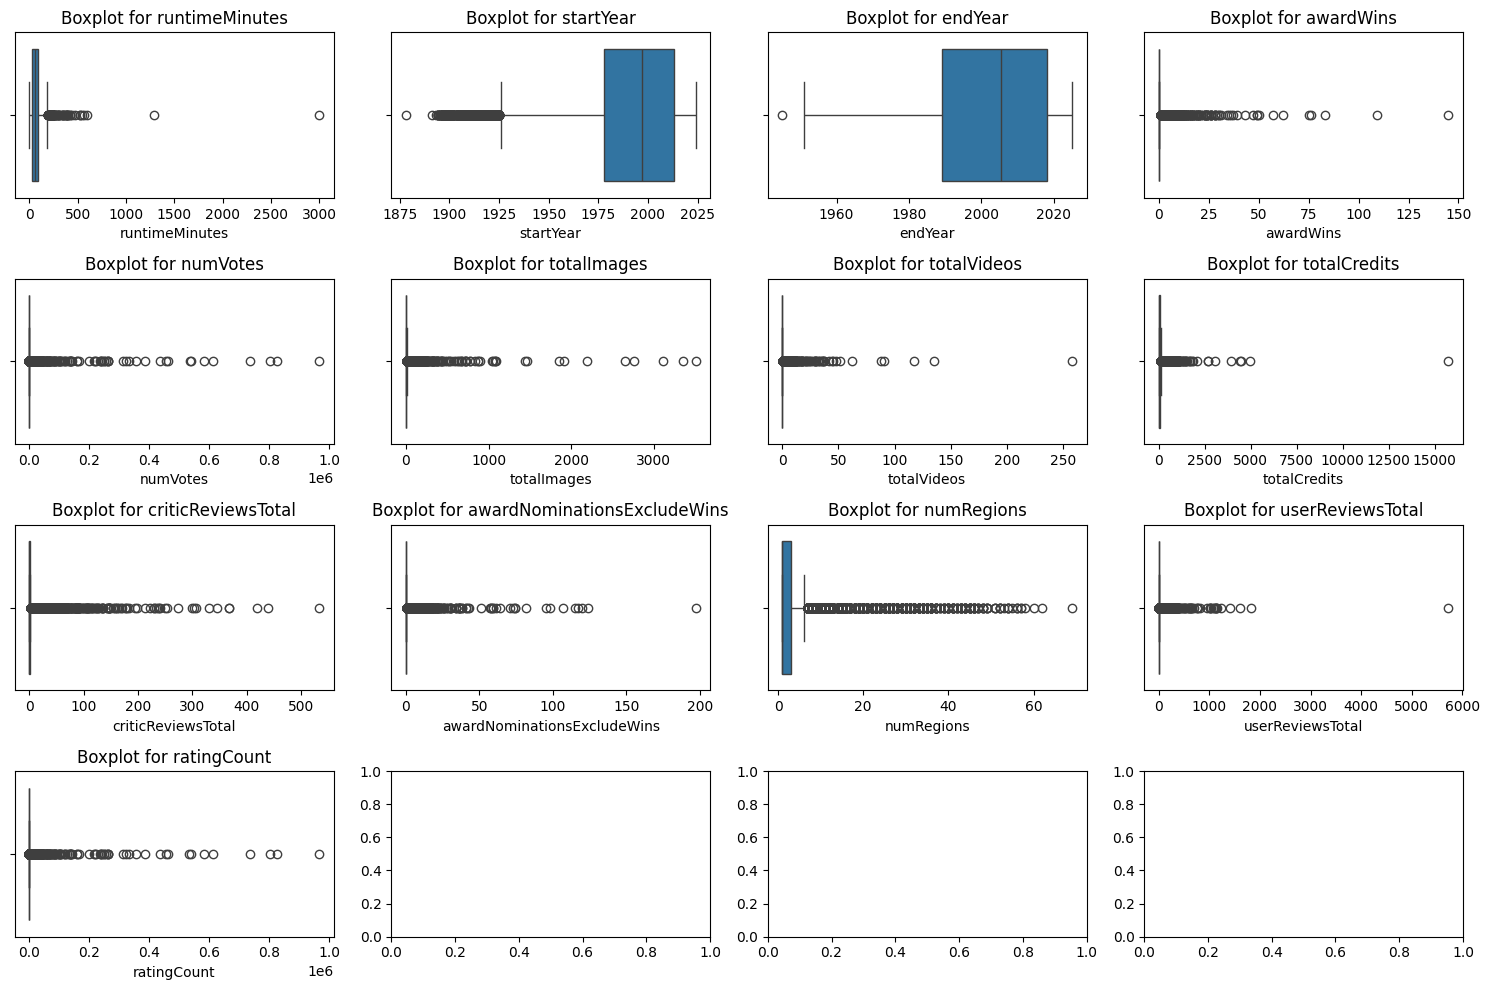

In [54]:
# DETECTING OUTLIERS

import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    return outliers, outlier_percentage

# Analyze specific variables
columns_to_analyze = train_df_num

for column in columns_to_analyze:
    outliers, percentage = detect_outliers(train_df, column)
    print(f"Variable: {column}")
    #print(f"list of outliers: {outliers[column]}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage:.2f}%")
    print("-" * 40)

# Visualize with boxplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_analyze):
    sns.boxplot(data=train_df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}")

plt.tight_layout()
plt.show()

### ricerca outlier nel train_df

In [55]:
# Trovare il massimo valore nella colonna
max_value = train_df['startYear'].min()

# Filtrare le righe con il valore massimo
extreme_outlier = train_df[train_df['startYear'] == max_value]
print(extreme_outlier)


''' 
# Trovare i 5 valori massimi nella colonna "runtimeMinutes"
top_5_values = train_df['runtimeMinutes'].nlargest(5)

for i in top_5_values:
    extreme_outlier = train_df[train_df['runtimeMinutes'] == i]
    print (extreme_outlier["originalTitle"], extreme_outlier["titleType"], i)

#print(top_5_values)

'''


      originalTitle  rating  startYear  endYear  runtimeMinutes  awardWins  \
15931     Le Fumeur  (4, 5]       1878      NaN             NaN        0.0   

       numVotes  worstRating  bestRating  totalImages  ...  titleType  \
15931        32            1          10            1  ...      short   

       awardNominationsExcludeWins  canHaveEpisodes isRatable  isAdult  \
15931                            0            False      True        0   

       numRegions  userReviewsTotal  ratingCount  countryOfOrigin  \
15931           1                 0           35           ['FR']   

                genres  
15931  Animation,Short  

[1 rows x 23 columns]


' \n# Trovare i 5 valori massimi nella colonna "runtimeMinutes"\ntop_5_values = train_df[\'runtimeMinutes\'].nlargest(5)\n\nfor i in top_5_values:\n    extreme_outlier = train_df[train_df[\'runtimeMinutes\'] == i]\n    print (extreme_outlier["originalTitle"], extreme_outlier["titleType"], i)\n\n#print(top_5_values)\n\n'

In [56]:
# Filtrare i record dove titleType è "tvSeries"
tv_series_runtime = train_df[train_df['titleType'] == 'tvSeries']['runtimeMinutes'].unique()

# Visualizzare i valori
print(tv_series_runtime)

[     nan 8.00e+01 3.00e+01 5.00e+01 6.50e+01 3.90e+01 2.50e+01 4.50e+01
 2.40e+01 6.00e+01 2.40e+02 5.10e+01 8.90e+01 1.46e+02 2.20e+01 2.30e+01
 5.50e+01 9.00e+01 4.00e+01 7.00e+01 4.20e+01 1.29e+03 3.00e+00 4.30e+01
 1.00e+01 3.28e+02 4.40e+01 7.00e+00 2.80e+01 2.60e+01 3.70e+01 1.10e+02
 1.50e+01 1.00e+02 5.40e+01 6.20e+01 2.70e+01 5.00e+00 1.20e+02 2.00e+01
 1.60e+01 2.25e+02 4.80e+01 3.50e+01 5.20e+01 2.00e+00 1.20e+01 1.00e+00
 4.00e+00 1.10e+01 5.90e+01 1.30e+01 3.52e+02 3.90e+02 2.90e+01 6.00e+00
 5.40e+02 1.80e+02 5.20e+02 2.10e+02 2.10e+01 5.80e+01 3.80e+01 4.70e+01
 8.00e+00 3.10e+01 1.64e+02 1.40e+02 8.80e+01 4.10e+01 4.00e+02 7.50e+01
 1.70e+02 3.30e+01 2.05e+02 6.10e+01 1.45e+02 1.43e+02 1.56e+02 9.00e+00
 1.65e+02 1.30e+02 3.00e+03 6.30e+01 3.96e+02 6.70e+01]


## outliers su pp

In [58]:
#importo df preprocessed
df_pp = pd.read_csv("pp_train.csv")

df_pp_num = df_pp[['fill_runtimeMinutes','startYear', 'endYear', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal']]
df_pp_cat = df_pp[['originalTitle', 'rating', 'titleType', 
                   'canHaveEpisodes',  'isAdult', 'countryOfOrigin', 
                   'is_Thriller', 'is_Family', 'is_Short', 'is_Sport',
       'is_Biography', 'is_Musical', 'is_Game-Show', 'is_Crime', 'is_Mystery',
       'is_Horror', 'is_Romance', 'is_Animation', 'is_Fantasy', 'is_Action',
       'is_Documentary', 'is_News', 'is_History', 'is_Adult', 'is_Reality-TV',
       'is_War', 'is_Sci-Fi', 'is_Talk-Show', 'is_Adventure', 'is_Film-Noir',
       'is_Music', 'is_Western', 'is_Comedy', 'is_Drama']]


Variable: fill_runtimeMinutes
Number of outliers: 108
Percentage of outliers: 0.66%
----------------------------------------
Variable: startYear
Number of outliers: 403
Percentage of outliers: 2.45%
----------------------------------------
Variable: endYear
Number of outliers: 1
Percentage of outliers: 0.01%
----------------------------------------
Variable: awardWins
Number of outliers: 1842
Percentage of outliers: 11.21%
----------------------------------------
Variable: numVotes
Number of outliers: 2523
Percentage of outliers: 15.36%
----------------------------------------
Variable: totalImages
Number of outliers: 2178
Percentage of outliers: 13.26%
----------------------------------------
Variable: totalVideos
Number of outliers: 1610
Percentage of outliers: 9.80%
----------------------------------------
Variable: totalCredits
Number of outliers: 1408
Percentage of outliers: 8.57%
----------------------------------------
Variable: criticReviewsTotal
Number of outliers: 2289
Percen

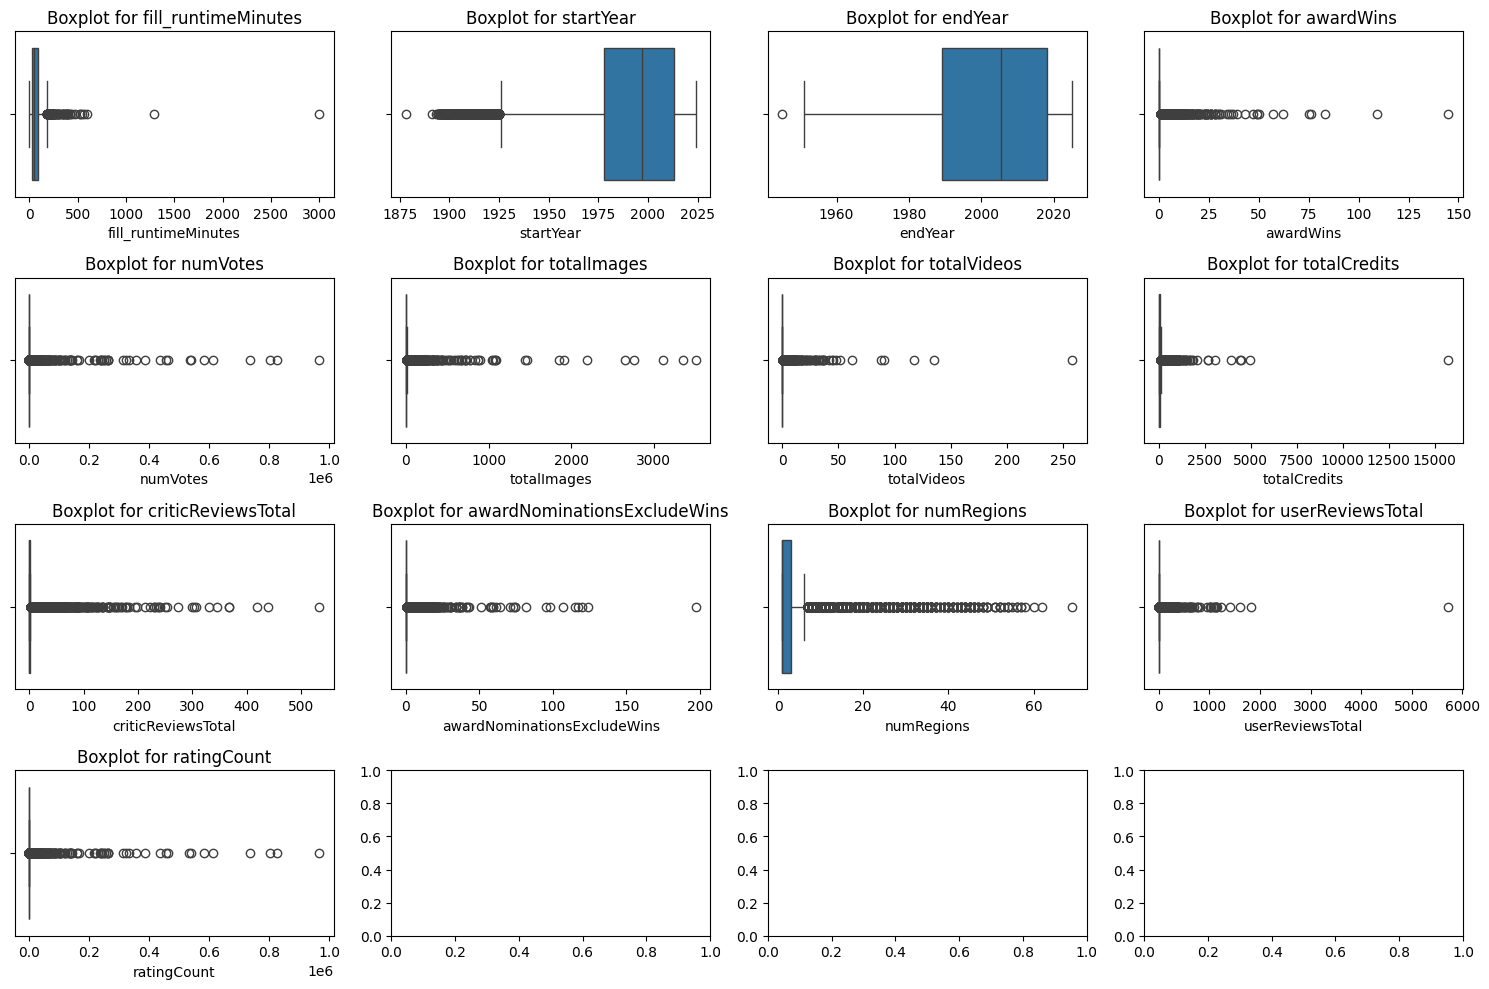

In [30]:
#OUTLIER DETECTION SU PP

import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    return outliers, outlier_percentage

# Analyze specific variables
columns_to_analyze = df_pp_num

for column in columns_to_analyze:
    outliers, percentage = detect_outliers(df_pp, column)
    print(f"Variable: {column}")
    #print(f"list of outliers: {outliers[column]}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage:.2f}%")
    print("-" * 40)

# Visualize with boxplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_analyze):
    sns.boxplot(data=df_pp, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}")

plt.tight_layout()
plt.show()

## OUTLIERS post trasformazione logaritmica (su df_pp)

### trasformazione log

In [59]:
columns_to_transform = ['fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal']
            
df_pp_transformed = df_pp.copy()
df_pp_transformed[columns_to_transform] = df_pp[columns_to_transform].apply(lambda col: np.log1p(col))


df_pp_transformed_num = df_pp_transformed[['fill_runtimeMinutes','startYear', 'endYear', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal']]


#### detection degli outliers

Variable: fill_runtimeMinutes
Number of outliers: 324
Percentage of outliers: 1.97%
----------------------------------------
Variable: startYear
Number of outliers: 403
Percentage of outliers: 2.45%
----------------------------------------
Variable: endYear
Number of outliers: 1
Percentage of outliers: 0.01%
----------------------------------------
Variable: awardWins
Number of outliers: 1842
Percentage of outliers: 11.21%
----------------------------------------
Variable: numVotes
Number of outliers: 418
Percentage of outliers: 2.54%
----------------------------------------
Variable: totalImages
Number of outliers: 764
Percentage of outliers: 4.65%
----------------------------------------
Variable: totalVideos
Number of outliers: 1610
Percentage of outliers: 9.80%
----------------------------------------
Variable: totalCredits
Number of outliers: 493
Percentage of outliers: 3.00%
----------------------------------------
Variable: criticReviewsTotal
Number of outliers: 1566
Percentage 

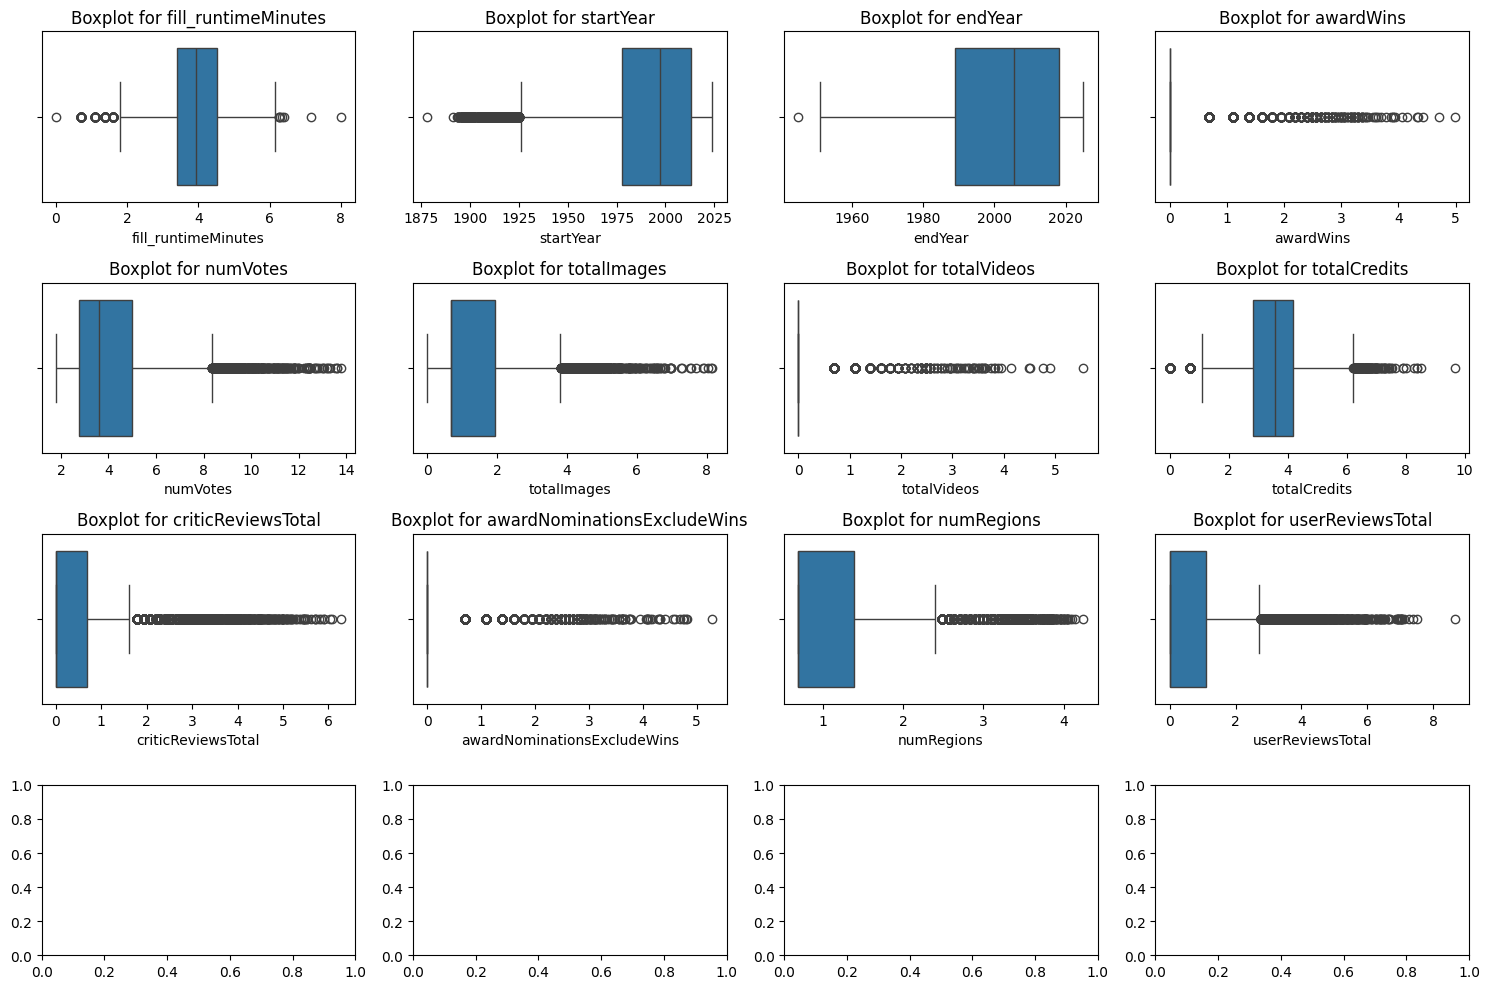

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    return outliers, outlier_percentage

# Analyze specific variables
columns_to_analyze = df_pp_transformed_num 

for column in columns_to_analyze:
    outliers, percentage = detect_outliers(df_pp_transformed, column)
    print(f"Variable: {column}")
    #print(f"list of outliers: {outliers[column]}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage:.2f}%")
    print("-" * 40)

# Visualize with boxplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_analyze):
    sns.boxplot(data=df_pp_transformed, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}")

plt.tight_layout()
plt.show()

## dteection che tiene conto degli attributo 0-inflated

In [67]:
import numpy as np
import pandas as pd
from scipy import stats

def detect_outliers_multi_attribute(df, zero_threshold=0.8, zscore_threshold=3):
    """
    Detect outliers across all numeric columns in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    zero_threshold (float): Threshold for zero-inflation
    zscore_threshold (float): Z-score threshold for outliers
    
    Returns:
    dict: Column names mapped to their outlier indices and zero-inflation status
    """
    results = {}
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numeric_columns:
        data = df[column].values
        zero_percentage = np.mean(data == 0)
        is_zero_inflated = zero_percentage >= zero_threshold
        
        if is_zero_inflated:
            non_zero_mask = data != 0
            non_zero_values = data[non_zero_mask]
            
            if len(non_zero_values) > 0:
                z_scores = np.abs(stats.zscore(non_zero_values))
                non_zero_outliers = z_scores > zscore_threshold
                outlier_indices = np.where(non_zero_mask)[0][non_zero_outliers]
            else:
                outlier_indices = np.array([])
        else:
            z_scores = np.abs(stats.zscore(data))
            outlier_indices = np.where(z_scores > zscore_threshold)[0]
            
        results[column] = {
            'outlier_indices': outlier_indices,
            'is_zero_inflated': is_zero_inflated,
            'zero_percentage': zero_percentage
        }
    
    return results


results = detect_outliers_multi_attribute(df_pp_transformed_num)
for col, info in results.items():
    print(f"{col}: {len(info['outlier_indices'])} outliers found; {info['is_zero_inflated']}")

fill_runtimeMinutes: 143 outliers found; False
startYear: 236 outliers found; False
endYear: 0 outliers found; False
awardWins: 36 outliers found; True
numVotes: 211 outliers found; False
totalImages: 199 outliers found; False
totalVideos: 46 outliers found; True
totalCredits: 159 outliers found; False
criticReviewsTotal: 429 outliers found; False
awardNominationsExcludeWins: 36 outliers found; True
numRegions: 284 outliers found; False
userReviewsTotal: 333 outliers found; False
